<a href="https://colab.research.google.com/github/gentleman101/Deep_Learning/blob/main/carnivores_image_classification_using_pre_trained_model_(Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

## Importing Pre-Trained model

In [3]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model,load_model
# importing inception net from Keras with imagenet weights
conv_base =  InceptionV3(weights='imagenet',include_top=False,input_shape=(300, 300, 3))

87916544/87910968 [==============================] - 1s 0us/step


In [4]:
output = conv_base.layers[-1].output
output = keras.layers.Flatten()(output)
model_tl = Model(conv_base.input, output)


In [5]:
model_tl.trainable = False
for layer in model_tl.layers:
  layer.trainable = False
layers = [(layer, layer.name, layer.trainable) for layer in  model_tl.layers]
model_layers=pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])
print(model_layers) 


                                            Layer Type  ... Layer Trainable
0    <tensorflow.python.keras.engine.input_layer.In...  ...           False
1    <tensorflow.python.keras.layers.convolutional....  ...           False
2    <tensorflow.python.keras.layers.normalization_...  ...           False
3    <tensorflow.python.keras.layers.core.Activatio...  ...           False
4    <tensorflow.python.keras.layers.convolutional....  ...           False
..                                                 ...  ...             ...
307  <tensorflow.python.keras.layers.merge.Concaten...  ...           False
308  <tensorflow.python.keras.layers.merge.Concaten...  ...           False
309  <tensorflow.python.keras.layers.core.Activatio...  ...           False
310  <tensorflow.python.keras.layers.merge.Concaten...  ...           False
311  <tensorflow.python.keras.layers.core.Flatten o...  ...           False

[312 rows x 3 columns]


## Data Pre-Processing

In [6]:
# Data Augmentation
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [7]:
test_size=400
batch_size=32
epochs=25

In [8]:
test_path='/content/drive/MyDrive/DATA/Carnivores_Data/test'
train_path='/content/drive/MyDrive/DATA/Carnivores_Data/train'

In [9]:
# Initiationg ImageDataGenerator on Keras
target_size=(300,300) #resize all images to 300x300
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,  
rotation_range=50,
width_shift_range=0.2, 
 height_shift_range=0.2, 
shear_range=0.2,
horizontal_flip=True,
brightness_range = [0.8, 1.2],
fill_mode='nearest',        
 validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
# The list of classes will be automatically inferred from the subdirectory names/structure under train_dir
train_generator = train_datagen.flow_from_directory(
train_path,
target_size=target_size,#  
batch_size=batch_size,
class_mode='categorical',
subset='training')
validation_generator = train_datagen.flow_from_directory(
train_path,
target_size=target_size,
batch_size=batch_size,
class_mode='categorical',
subset='validation')

Found 2899 images belonging to 1 classes.
Found 724 images belonging to 1 classes.


## Building Model Architecture

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import optimizers
# building a linear stack of layers with the sequential model
model =Sequential()
model.add(model_tl)
# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
# output layer
model.add(Dense(4, activation='softmax'))
# compiling the sequential model
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 131072)            21802784  
_________________________________________________________________
dense (Dense)                (None, 128)               16777344  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 38,580,644
Trainable params: 16,777,860
Non-trainable params: 21,802,784
_________________________________________________________________
None


Creating Checkpoints so to recover if sessiosn is disconected

In [12]:
from keras.callbacks import *
filepath="/content/drive/My Drive/MyCNN/epochs:{epoch:03d}-val_acc: {val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_acc',verbose=1,save_best_only=False,save_freq='epoch',mode='max')
callbacks_list = [checkpoint]

## Training the model

In [12]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples//batch_size,validation_data=validation_generator,
validation_steps=validation_generator.samples//batch_size,
epochs=epochs,verbose=1,shuffle=True,callbacks=callbacks_list)

Epoch 1/25
90/90 [==============================] - 2024s 22s/step - loss: 148.1843 - acc: 0.1965 - val_loss: 91.9612 - val_acc: 0.0000e+00

Epoch 00001: saving model to /content/drive/My Drive/MyCNN/epochs:001-val_acc: 0.000.hdf5
Epoch 2/25
90/90 [==============================] - 92s 1s/step - loss: 603.7670 - acc: 0.1700 - val_loss: 236.4824 - val_acc: 0.0000e+00

Epoch 00002: saving model to /content/drive/My Drive/MyCNN/epochs:002-val_acc: 0.000.hdf5
Epoch 3/25
90/90 [==============================] - 92s 1s/step - loss: 1097.3160 - acc: 0.1713 - val_loss: 321.8528 - val_acc: 0.0000e+00

Epoch 00003: saving model to /content/drive/My Drive/MyCNN/epochs:003-val_acc: 0.000.hdf5
Epoch 4/25
90/90 [==============================] - 92s 1s/step - loss: 1583.3228 - acc: 0.1325 - val_loss: 470.8393 - val_acc: 0.0000e+00

Epoch 00004: saving model to /content/drive/My Drive/MyCNN/epochs:004-val_acc: 0.000.hdf5
Epoch 5/25
90/90 [==============================] - 92s 1s/step - loss: 2065.584

## Model Performance

In [13]:
# Model evaluation
scores_train = model.evaluate(train_generator,verbose=1)
scores_validation = model.evaluate(validation_generator,verbose=1)
print("Train Accuracy: %.2f%%" % (scores_train[1]*100))
print("Validation Accuracy: %.2f%%" % (scores_validation[1]*100))
#For plotting Accuracy and Loss
def LearningCurve(history):
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()
  LearningCurve(history)


23/23 [==============================] - 341s 15s/step - loss: 7.4967 - acc: 0.9738
Train Accuracy: 92.31%
Validation Accuracy: 97.38%


In [17]:
  #Save the trained model to a file 
  model_weight_file='/content/drive/MyDrive/MyCNN/carnivores_tlearn_img_aug_cnn.h5'
  model.save(model_weight_file)


## Making Predictions

Found 400 images belonging to 4 classes.
13/13 [==============================] - 254s 21s/step
[[100   0   0   0]
 [ 94   3   2   1]
 [ 92   0   8   0]
 [ 96   0   0   4]]
              precision    recall  f1-score   support

     cheetah       0.26      1.00      0.41       100
       hyena       1.00      0.03      0.06       100
      jaguar       0.80      0.08      0.15       100
       tiger       0.80      0.04      0.08       100

    accuracy                           0.29       400
   macro avg       0.72      0.29      0.17       400
weighted avg       0.72      0.29      0.17       400



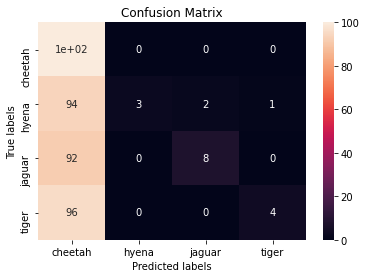

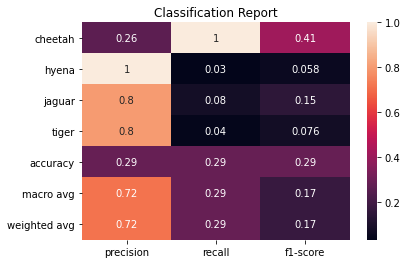

In [18]:
# We take the ceiling because we do not drop the remainder of the batch
import math
compute_steps_per_epoch = lambda x: int(math.ceil(1. * x / batch_size))
test_steps = compute_steps_per_epoch(test_size)
test_generator = test_datagen.flow_from_directory(
                 test_path,
                 target_size=target_size, 
                 batch_size=batch_size,
                 class_mode=None,
                 shuffle=False)
test_generator.reset()
#Calling the saved model for making predictions
tl_img_aug_cnn = load_model(model_weight_file)
pred=tl_img_aug_cnn.predict(test_generator,
                            verbose=1,
                            steps=test_steps)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
#create a function for visualizing model performance
import seaborn as sns
def PerformanceReports(conf_matrix,class_report,labels):
    ax= plt.subplot()
    sns.heatmap(conf_matrix, annot=True,ax=ax)
    #labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    plt.show()
    ax= plt.subplot()
    sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T,  
                annot=True,ax=ax)
    ax.set_title('Classification Report')
    plt.show()
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
labels=['cheetah','hyena','jaguar','tiger']
test_labels = [fn.split('/')[0] for fn in filenames]
cm=confusion_matrix(test_labels,predictions)
print(cm)
cr=classification_report(test_labels, predictions)
class_report=classification_report(test_labels, predictions,
                                   target_names=labels,
                                   output_dict=True)
print(cr)
PerformanceReports(cm,class_report,labels)